## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
# os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Store data, labels in the list

In [73]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [74]:
cur_path

'f:\\Traffic_Signs_WebApp-Project-Hetvi-Bhora'

## Preprocess the images

In [75]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [76]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [77]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [78]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [79]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)    # total training images = 39209 out of them train = 31367 , test = 7842

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [82]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [83]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [84]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 89s 90ms/step - loss: 2.0744 - accuracy: 0.4763 - val_loss: 0.6430 - val_accuracy: 0.8484
Epoch 2/20
981/981 [==============================] - 83s 84ms/step - loss: 0.7980 - accuracy: 0.7667 - val_loss: 0.3117 - val_accuracy: 0.9124
Epoch 3/20
981/981 [==============================] - 77s 79ms/step - loss: 0.5548 - accuracy: 0.8349 - val_loss: 0.1925 - val_accuracy: 0.9492
Epoch 4/20
981/981 [==============================] - 79s 80ms/step - loss: 0.4399 - accuracy: 0.8694 - val_loss: 0.1483 - val_accuracy: 0.9589
Epoch 5/20
981/981 [==============================] - 80s 81ms/step - loss: 0.3643 - accuracy: 0.8921 - val_loss: 0.1639 - val_accuracy: 0.9570
Epoch 6/20
981/981 [==============================] - 78s 79ms/step - loss: 0.3516 - accuracy: 0.8979 - val_loss: 0.1149 - val_accuracy: 0.9662
Epoch 7/20
981/981 [==============================] - 80s 81ms/step - loss: 0.3257 - accuracy: 0.9066 - val_loss: 0.1304 - val_accuracy:

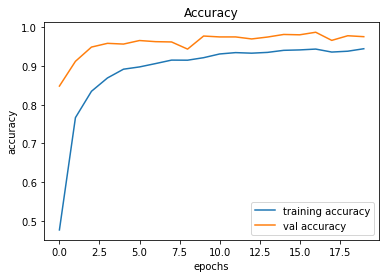

In [97]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

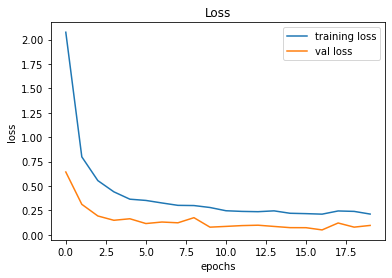

In [92]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [3]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((32,32))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [4]:
X_test, label = testing('Test.csv')

In [6]:
Y_pred2 = np.argmax(model.predict(X_test), axis=-1)

395/395 [==============================] - 34s 81ms/step


In [7]:
len(Y_pred2)

12630

In [8]:
len(X_test)

12630

## Accuracy with the test data

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred2))

0.9289786223277909


## Save the model

In [104]:
model.save("./training/mymodel.h5")   # simple CNN

In [5]:
# model = load_model('F:\Sem_6_Traffic_Signs_WebApp-Project-Hetvi-Bhora\model\TSC_model.h5')


## Load the Model

In [105]:
import os
os.chdir(r'f:\\Traffic_Signs_WebApp-Project-Hetvi-Bhora')  
from keras.models import load_model
# model = load_model('./training/TSR.h5')
model = load_model('./training/mymodel.h5')


In [13]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

1/1 [==============================] - 2s 2s/step
Predicted traffic sign is:  Speed limit (30km/h)


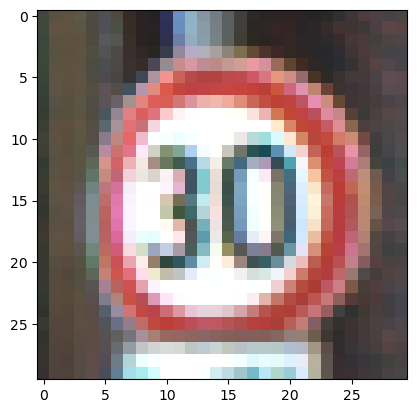

In [16]:
plot,prediction = test_on_img(r'F:\Sem_6_Traffic_Signs_WebApp-Project-Hetvi-Bhora\00001.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()